# 00 Quickstart: Minimal Scalar Nonsmooth ODE (Sign Projection)

This notebook is a *canonical minimal* example showing how to use the low-level API.

We solve the 1D nonsmooth ODE  y'(t) = -sign(y)  by introducing an auxiliary variable w with the constraint w ∈ sign(y).
The actual system we integrate is: y' = -w,  w' = 0  (w enforced by projection each implicit step).

**Features illustrated**:
- Manual assembly of solver components (projection → nonlinear solver → integrator → system → time driver).
- Backward Euler fixed-step vs adaptive-step runs.
- Residual norms (`fk`) inspection.
- `skip_error_indices` (we skip the purely projected coordinate w in adaptive controller).
- Using Python's built-in `help()` to view documentation for components.

**Expected runtime**: < 5 seconds.

---

## Imports

In [1]:
import numpy as np
from Solve_IVP_NS import solve_ivp_ns



## Problem Definition
State vector: Y = [y, w]. Projection enforces w ∈ sign(y). We choose y(0)=1.0 (positive region).

In [2]:
# simple smooth rhs: y' = -y
rhs = lambda t, y: -y



## Inspect Documentation with help() (abridged examples)

In [3]:
# Uncomment to view docs (kept commented to avoid verbose output)
# help(BackwardEuler)
# help(SignProjection)
# help(ImplicitEquationSolver)
print('Use help(ClassName) to inspect full docstrings.')

Use help(ClassName) to inspect full docstrings.


## Fixed-Step Backward Euler (VI solver)
We run Backward Euler with a constant step size. Residual norms (`||fk||`) are stored per accepted step.

In [4]:
t_span = (0.0, 1.0)
y0 = np.array([1.0])

# identity projection, VI solver via composite integrator
sol = solve_ivp_ns(
    fun=rhs,
    t_span=t_span,
    y0=y0,
    method='composite',
    projection='identity',
    solver='VI',
)

print(sol[0][:5], sol[1][:5])  # t, y samples

identity
[0.   0.01 0.03 0.07 0.15] [[1.        ]
 [0.99004982]
 [0.97044544]
 [0.93239311]
 [0.86070272]]


## Adaptive Backward Euler (VI) with skip_error_indices
We enable the adaptive controller and skip the w-component (index 1) in the error norm.

## Plot Solutions and Step Sizes

## Residual Norms Comparison

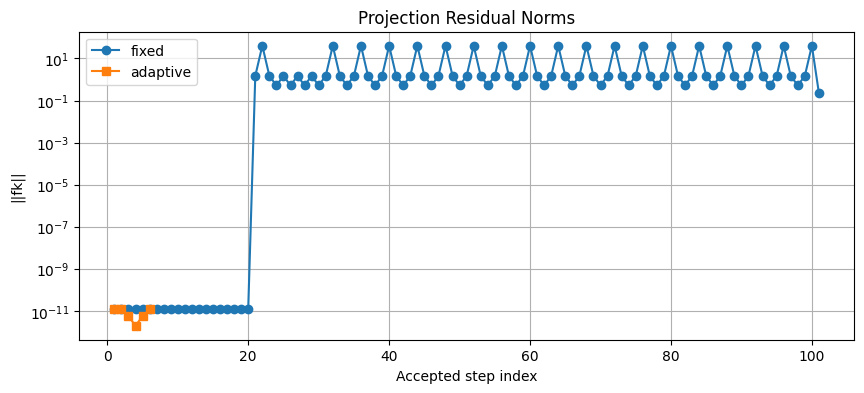

In [9]:
plt.figure(figsize=(10,4))
plt.semilogy(range(1, len(residual_norms_fixed)+1), residual_norms_fixed, 'o-', label='fixed')
plt.semilogy(range(1, len(residual_norms_adapt)+1), residual_norms_adapt, 's-', label='adaptive')
plt.xlabel('Accepted step index'); plt.ylabel('||fk||'); plt.title('Projection Residual Norms'); plt.legend(); plt.grid(True, which='both')
plt.show()

## Summary
- Both runs converge y → 0; w remains ±1 depending on sign region.
- Adaptive controller chose variable h while ignoring w in error norm.
- Residual norms remain tiny (well within tolerance).
- `help(Class)` surfaces full API documentation for deeper exploration.

**Next ideas**: Try `method='semismooth_newton'`, vary tolerances, or introduce a damping term.